# Описание соревнований.

## <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description'>House Prices - Advanced Regression Techniques</a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})
TRAIN_PATH = './house-prices-advanced-regression-techniques/train.csv'
TEST_PATH = './house-prices-advanced-regression-techniques/test.csv'
SUBMIT_PATH = './house-prices-advanced-regression-techniques/sample_submission.csv'

## 2. Загрузка данных в Data Frame
#### Описание файлов
- train.csv - тренировочные данные
- test.csv - тестовые данные
- sampleSubmission.csv - образец файла для отправки в правильном формате
#### Описание признаков данных
- Id: identification number
- MSSubClass: Identifies the type of dwelling involved in the sale.	
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
 - 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [2]:
# Импортируем данные train.csv в pandas Dataframe
df_train = pd.read_csv(TRAIN_PATH, sep=',')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Рассмотрим поближе каждую характеристику 


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Рассмотрим поближе каждую характеристику 


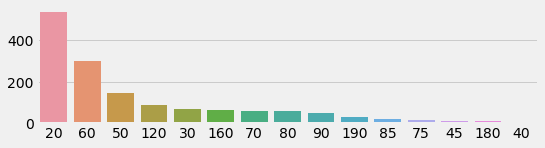


Количество пропущенных элементов 0
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Количество уникальных элементов 15


In [4]:
#MSSubClass: Identifies the type of dwelling involved in the sale.	
index = 'MSSubClass'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

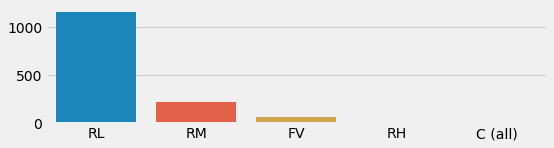


Количество пропущенных элементов 0
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Количество уникальных элементов 5


In [5]:
#MSZoning: Identifies the general zoning classification of the sale.
index = 'MSZoning'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

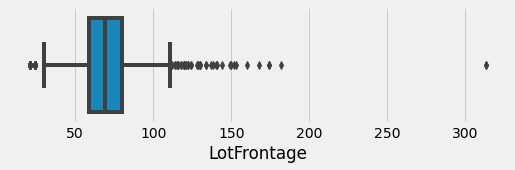


Количество пропущенных элементов 259
Количество уникальных элементов 110
median - 69.000
mean - 70.050
mode - 60.000
квантиль 5% - 34.000
квантиль 98% - 124.000
21.0     23
24.0     19
30.0      6
32.0      5
33.0      1
         ..
160.0     1
168.0     1
174.0     2
182.0     1
313.0     2
Name: LotFrontage, Length: 110, dtype: int64


In [6]:
#LotFrontage: Linear feet of street connected to property
index = 'LotFrontage'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

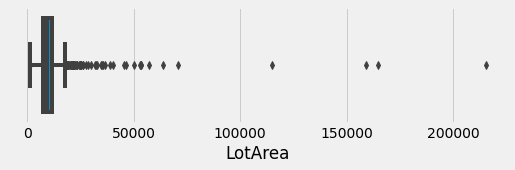


Количество пропущенных элементов 0
Количество уникальных элементов 1073
median - 9478.500
mean - 10516.828
mode - 7200.000
квантиль 5% - 3311.700
квантиль 98% - 25251.620
1300      1
1477      1
1491      1
1526      1
1533      2
         ..
70761     1
115149    1
159000    1
164660    1
215245    1
Name: LotArea, Length: 1073, dtype: int64


In [7]:
#LotArea: Lot size in square feet
index = 'LotArea'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

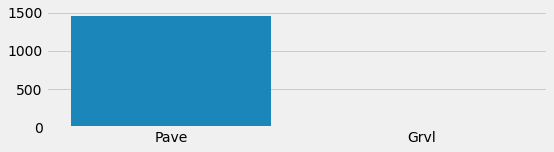


Количество пропущенных элементов 0
Pave    1454
Grvl       6
Name: Street, dtype: int64

Количество уникальных элементов 2


In [8]:
#Street: Type of road access to property
index = 'Street'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')
#Удаляем 

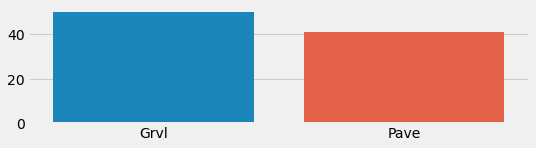


Количество пропущенных элементов 1369
Grvl    50
Pave    41
Name: Alley, dtype: int64

Количество уникальных элементов 2


In [9]:
#Alley: Type of alley access to property
index = 'Alley'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

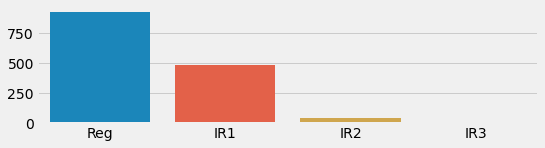


Количество пропущенных элементов 0
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Количество уникальных элементов 4


In [10]:
#LotShape: General shape of property
index = 'LotShape'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

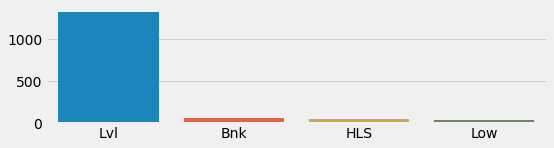


Количество пропущенных элементов 0
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Количество уникальных элементов 4


In [11]:
#LandContour: Flatness of the property
index = 'LandContour'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

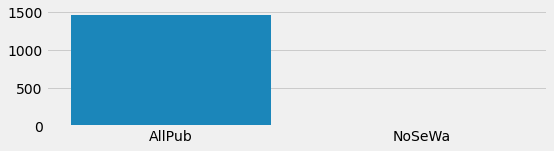


Количество пропущенных элементов 0
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Количество уникальных элементов 2


In [12]:
#Utilities: Type of utilities available
index = 'Utilities'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')
#удалить

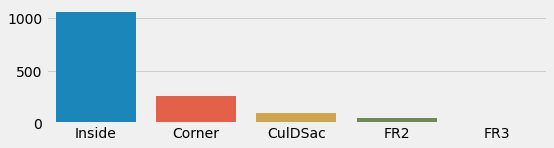


Количество пропущенных элементов 0
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Количество уникальных элементов 5


In [13]:
#LotConfig: Lot configuration
index = 'LotConfig'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

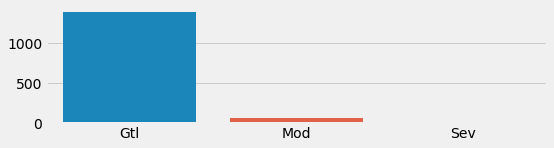


Количество пропущенных элементов 0
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Количество уникальных элементов 3


In [14]:
#LandSlope: Slope of property
index = 'LandSlope'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

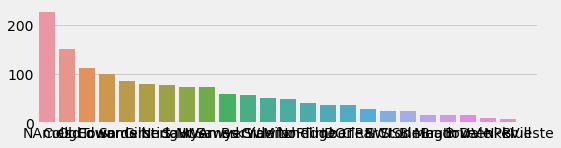


Количество пропущенных элементов 0
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Количество уникальных элементов 25


In [15]:
#Neighborhood: Physical locations within Ames city limits
index = 'Neighborhood'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

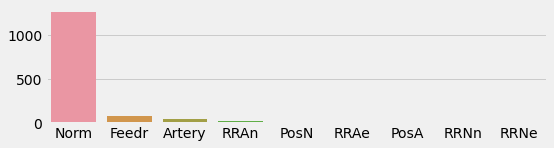


Количество пропущенных элементов 0
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Количество уникальных элементов 9


In [16]:
#Condition1: Proximity to various conditions
index = 'Condition1'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

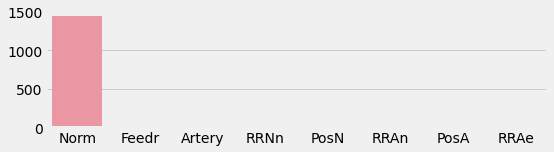


Количество пропущенных элементов 0
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

Количество уникальных элементов 8


In [17]:
#Condition2: Proximity to various conditions (if more than one is present)
index = 'Condition2'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')
#удалить

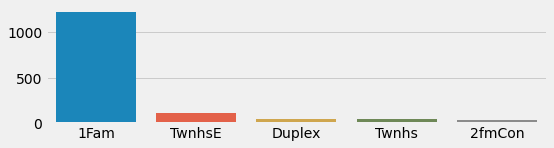


Количество пропущенных элементов 0
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Количество уникальных элементов 5


In [18]:
#BldgType: Type of dwelling
index = 'BldgType'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

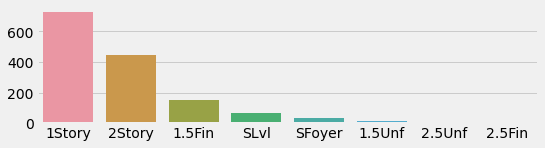


Количество пропущенных элементов 0
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Количество уникальных элементов 8


In [19]:
#HouseStyle: Style of dwelling
index = 'HouseStyle'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

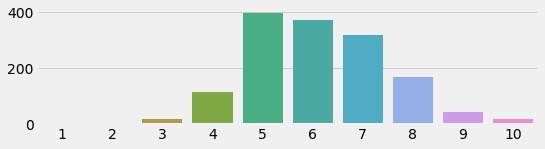


Количество пропущенных элементов 0
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Количество уникальных элементов 10


In [20]:
#OverallQual: Rates the overall material and finish of the house
index = 'OverallQual'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

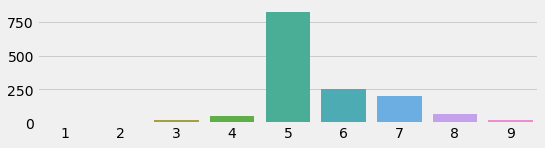


Количество пропущенных элементов 0
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

Количество уникальных элементов 9


In [21]:
#OverallCond: Rates the overall condition of the house
index = 'OverallCond'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

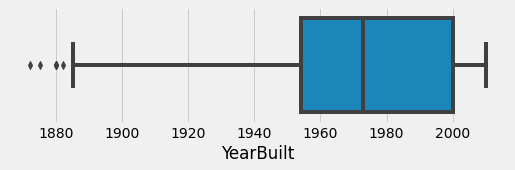


Количество пропущенных элементов 0
Количество уникальных элементов 112
median - 1973.000
mean - 1971.268
mode - 2006.000
квантиль 5% - 1916.000
квантиль 98% - 2008.000
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: YearBuilt, Length: 112, dtype: int64


In [22]:
#YearBuilt: Original construction date
index = 'YearBuilt'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

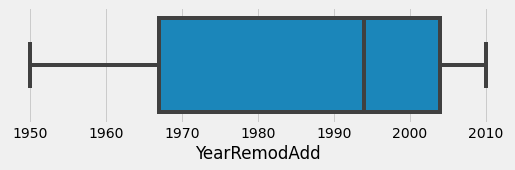


Количество пропущенных элементов 0
Количество уникальных элементов 61
median - 1994.000
mean - 1984.866
mode - 1950.000
квантиль 5% - 1950.000
квантиль 98% - 2008.000
1950    178
1951      4
1952      5
1953     10
1954     14
       ... 
2006     97
2007     76
2008     40
2009     23
2010      6
Name: YearRemodAdd, Length: 61, dtype: int64


In [23]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
index = 'YearRemodAdd'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

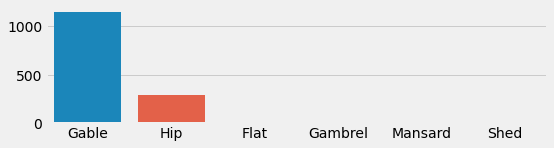


Количество пропущенных элементов 0
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

Количество уникальных элементов 6


In [24]:
#RoofStyle: Type of roof
index = 'RoofStyle'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

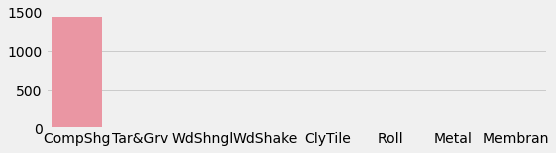


Количество пропущенных элементов 0
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

Количество уникальных элементов 8


In [25]:
#RoofMatl: Roof material
index = 'RoofMatl'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')
#удалить

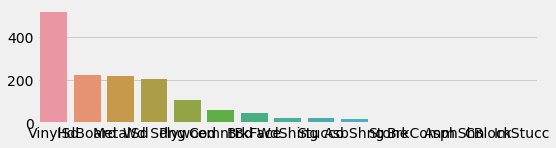


Количество пропущенных элементов 0
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

Количество уникальных элементов 15


In [26]:
#Exterior1st: Exterior covering on house
index = 'Exterior1st'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

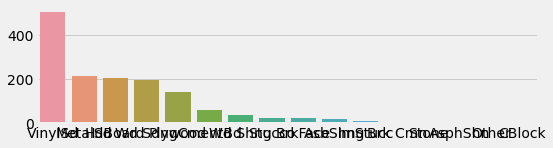


Количество пропущенных элементов 0
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

Количество уникальных элементов 16


In [27]:
#Exterior2nd: Exterior covering on house (if more than one material)
index = 'Exterior2nd'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

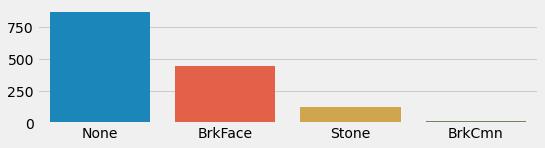


Количество пропущенных элементов 8
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Количество уникальных элементов 4


In [28]:
#MasVnrType: Masonry veneer type
index = 'MasVnrType'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

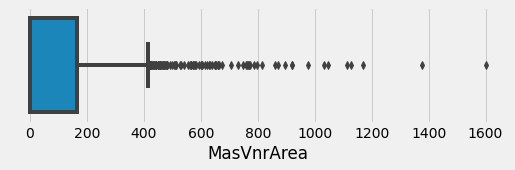


Количество пропущенных элементов 8
Количество уникальных элементов 327
median - 0.000
mean - 103.685
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 650.980
0.0       861
1.0         2
11.0        1
14.0        1
16.0        7
         ... 
1115.0      1
1129.0      1
1170.0      1
1378.0      1
1600.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [29]:
#MasVnrArea: Masonry veneer area in square feet
index = 'MasVnrArea'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

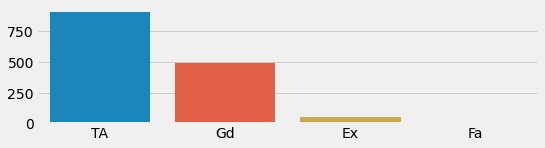


Количество пропущенных элементов 0
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

Количество уникальных элементов 4


In [30]:
#ExterQual: Evaluates the quality of the material on the exterior 
index = 'ExterQual'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

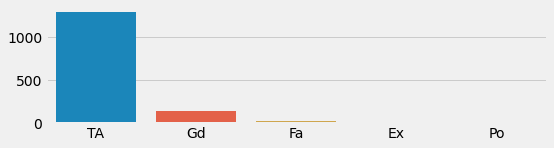


Количество пропущенных элементов 0
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

Количество уникальных элементов 5


In [31]:
#ExterCond: Evaluates the present condition of the material on the exterior
index = 'ExterCond'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

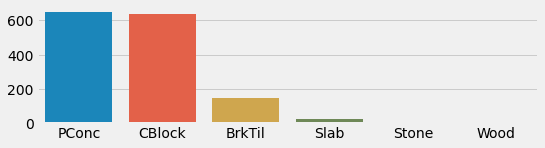


Количество пропущенных элементов 0
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Количество уникальных элементов 6


In [32]:
#Foundation: Type of foundation
index = 'Foundation'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

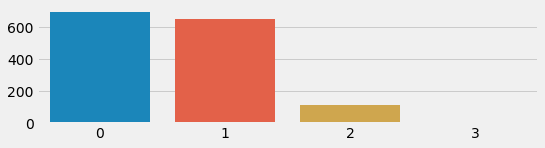


Количество пропущенных элементов 0
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

Количество уникальных элементов 4


In [33]:
#Fireplaces: Number of fireplaces
index = 'Fireplaces'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

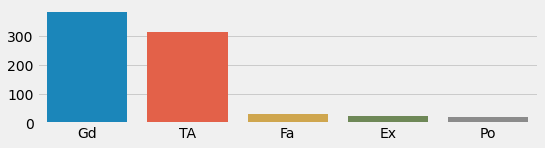


Количество пропущенных элементов 690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Количество уникальных элементов 5


In [34]:
#FireplaceQu: Fireplace quality
index = 'FireplaceQu'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

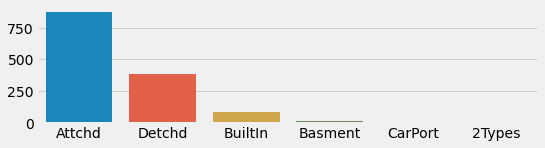


Количество пропущенных элементов 81
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Количество уникальных элементов 6


In [35]:
#GarageType: Garage location
index = 'GarageType'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

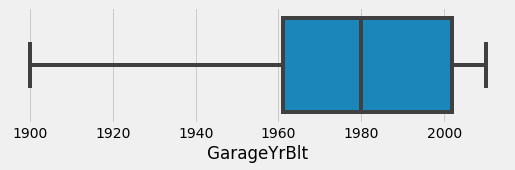


Количество пропущенных элементов 81
Количество уникальных элементов 97
median - 1980.000
mean - 1978.506
mode - 2005.000
квантиль 5% - 1930.000
квантиль 98% - 2008.000
1900.0     1
1906.0     1
1908.0     1
1910.0     3
1914.0     2
          ..
2006.0    59
2007.0    49
2008.0    29
2009.0    21
2010.0     3
Name: GarageYrBlt, Length: 97, dtype: int64


In [36]:
#GarageYrBlt: Year garage was built
index = 'GarageYrBlt'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

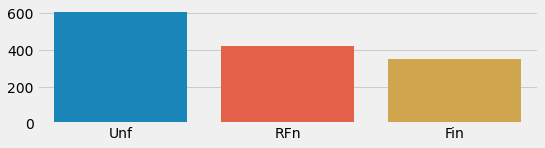


Количество пропущенных элементов 81
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

Количество уникальных элементов 3


In [37]:
#GarageFinish: Interior finish of the garage
index = 'GarageFinish'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

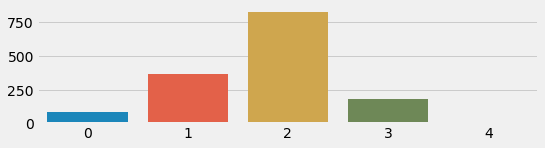


Количество пропущенных элементов 0
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

Количество уникальных элементов 5


In [38]:
#GarageCars: Size of garage in car capacity
index = 'GarageCars'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

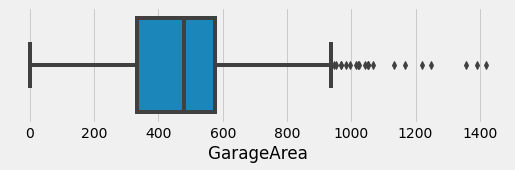


Количество пропущенных элементов 0
Количество уникальных элементов 441
median - 480.000
mean - 472.980
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 907.460
0       81
160      2
164      1
180      9
186      1
        ..
1220     1
1248     1
1356     1
1390     1
1418     1
Name: GarageArea, Length: 441, dtype: int64


In [39]:
#GarageArea: Size of garage in square feet
index = 'GarageArea'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

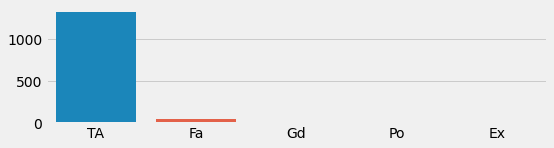


Количество пропущенных элементов 81
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

Количество уникальных элементов 5


In [40]:
#GarageQual: Garage quality
index = 'GarageQual'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

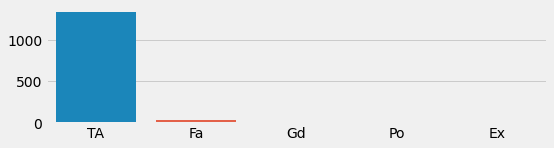


Количество пропущенных элементов 81
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Количество уникальных элементов 5


In [41]:
#GarageCond: Garage condition
index = 'GarageCond'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

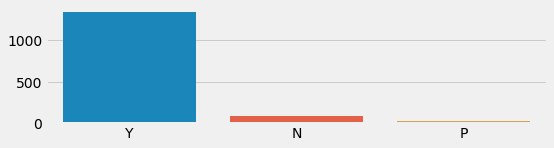


Количество пропущенных элементов 0
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

Количество уникальных элементов 3


In [42]:
#PavedDrive: Paved driveway
index = 'PavedDrive'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

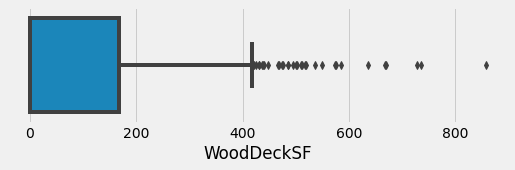


Количество пропущенных элементов 0
Количество уникальных элементов 274
median - 0.000
mean - 94.245
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 430.100
0      761
12       2
24       2
26       2
28       2
      ... 
668      1
670      1
728      1
736      1
857      1
Name: WoodDeckSF, Length: 274, dtype: int64


In [43]:
#WoodDeckSF: Wood deck area in square feet
index = 'WoodDeckSF'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

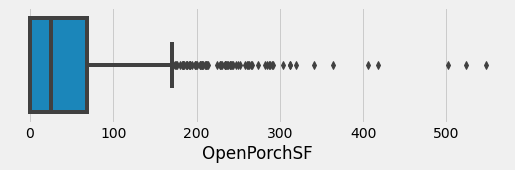


Количество пропущенных элементов 0
Количество уникальных элементов 202
median - 25.000
mean - 46.660
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 240.820
0      656
4        1
8        1
10       1
11       1
      ... 
406      1
418      1
502      1
523      1
547      1
Name: OpenPorchSF, Length: 202, dtype: int64


In [44]:
#OpenPorchSF: Open porch area in square feet
index = 'OpenPorchSF'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

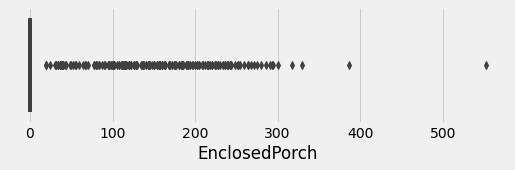


Количество пропущенных элементов 0
Количество уникальных элементов 120
median - 0.000
mean - 21.954
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 235.640
0      1252
19        1
20        1
24        1
30        1
       ... 
301       1
318       1
330       1
386       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64


In [45]:
#EnclosedPorch: Enclosed porch area in square feet
index = 'EnclosedPorch'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

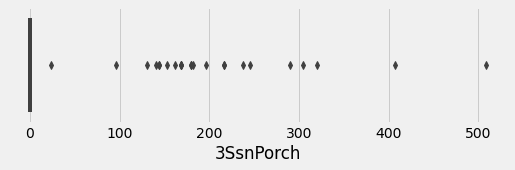


Количество пропущенных элементов 0
Количество уникальных элементов 20
median - 0.000
mean - 3.410
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 0.000
0      1436
23        1
96        1
130       1
140       1
144       2
153       1
162       1
168       3
180       2
182       1
196       1
216       2
238       1
245       1
290       1
304       1
320       1
407       1
508       1
Name: 3SsnPorch, dtype: int64


In [46]:
#3SsnPorch: Three season porch area in square feet
index = '3SsnPorch'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

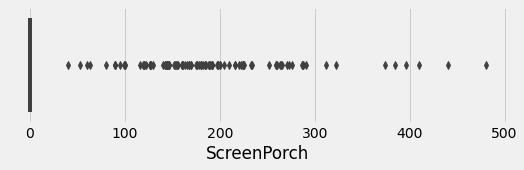


Количество пропущенных элементов 0
Количество уникальных элементов 76
median - 0.000
mean - 15.061
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 223.640
0      1344
40        1
53        1
60        1
63        1
       ... 
385       1
396       1
410       1
440       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64


In [47]:
#ScreenPorch: Screen porch area in square feet
index = 'ScreenPorch'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

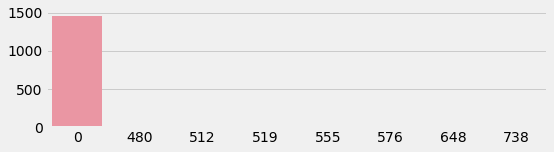


Количество пропущенных элементов 0
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

Количество уникальных элементов 8


In [48]:
#PoolArea: Pool area in square feet
index = 'PoolArea'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

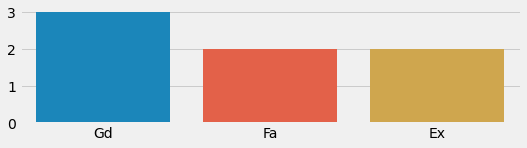


Количество пропущенных элементов 1453
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

Количество уникальных элементов 3


In [49]:
#PoolQC: Pool quality
index = 'PoolQC'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

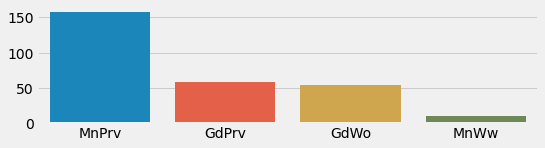


Количество пропущенных элементов 1179
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Количество уникальных элементов 4


In [50]:
#Fence: Fence quality
index = 'Fence'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

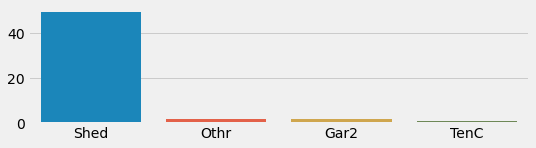


Количество пропущенных элементов 1406
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

Количество уникальных элементов 4


In [51]:
#MiscFeature: Miscellaneous feature not covered in other categories
index = 'MiscFeature'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

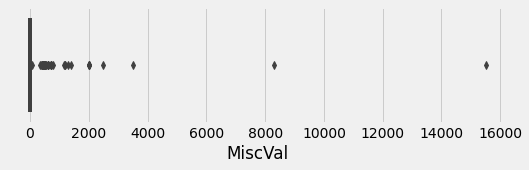


Количество пропущенных элементов 0
Количество уникальных элементов 21
median - 0.000
mean - 43.489
mode - 0.000
квантиль 5% - 0.000
квантиль 98% - 500.000
0        1408
54          1
350         1
400        11
450         4
480         2
500         8
560         1
600         4
620         1
700         5
800         1
1150        1
1200        2
1300        1
1400        1
2000        4
2500        1
3500        1
8300        1
15500       1
Name: MiscVal, dtype: int64


In [52]:
#MiscVal: $Value of miscellaneous feature
index = 'MiscVal'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

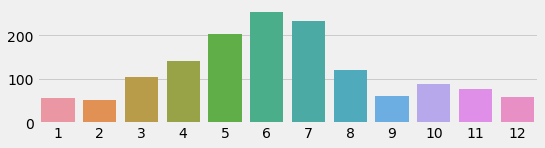


Количество пропущенных элементов 0
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

Количество уникальных элементов 12


In [53]:
#MoSold: Month Sold (MM)
index = 'MoSold'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

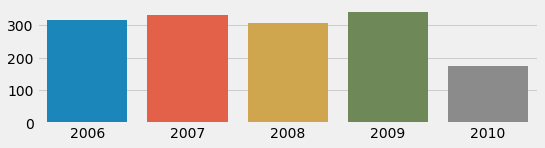


Количество пропущенных элементов 0
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

Количество уникальных элементов 5


In [54]:
#YrSold: Year Sold (YYYY)
index = 'YrSold'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

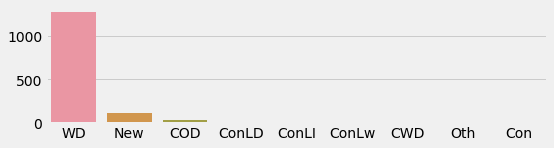


Количество пропущенных элементов 0
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Количество уникальных элементов 9


In [55]:
#SaleType: Type of sale
index = 'SaleType'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

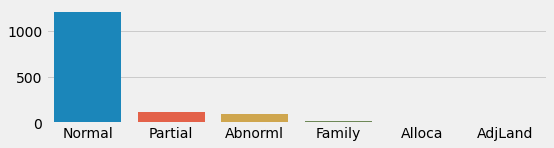


Количество пропущенных элементов 0
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Количество уникальных элементов 6


In [56]:
#SaleCondition: Condition of sale
index = 'SaleCondition'
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')